# Máster en Data Science - Machine Learning

# Undersampling, Oversampling y Modelado
Autor: Ramón Morillo Barrera

## Dataset: Application data

En este notebook se llevará a cabo el tratamiento último a los datos antes de la implementación y análisis de los diferentes modelos de ML. Realizaremos Oversampling y Undersampling con el objetivo de balancear nuestra variable objetivo y ver como se comportan los diferentes modelos de ML que implementaremos durante el entrenamiento. Implantaremos estos modelos a nuestros datos anteriormente estudiados, limpios y preprocesados. Estamos ante un problema de clasificación, es por ello que intentaremos predecir la clase de nuestra variable objetivo. Se probarán varios modelos de ML estudiados:
- Modelo Base
- Modelo dummy
- Modelo GLM 
- Modelo SVM
- Modelo Random Forest
- Modelo XGBoost
- Modelo LightGBM
- Modelo GradienBoosting
- Modelo AdaBoost
- Modelo Naive Bayes

Estos modelos se aplicarán con sus configuraciones por defecto, posteriormente se seleccionará la configuración de datos que funcione mejor con nuestro modelo para terminar por buscar los hiperparámetros que mejores resultados obtengan. Para todos estos procesos de comparación de modelos se utilizará un set de validación, que surgirá de volver a dividir en 70-30 al set de entrenamiento.

#### Librerías

In [1]:
import sys
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, fbeta_score, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix, calinski_harabasz_score, silhouette_samples

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.svm import SVC, LinearSVC, NuSVC
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
from joblib import dump, load

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Funciones

In [2]:
sys.path.append('../src')
import funciones_auxiliares as f_aux
sys.path.remove('../src')

# Constante
seed = 12354

#### Importación de datos

In [3]:
df_loan_train_processed = pd.read_csv("../../data_loan_status/processed/df_loan_train_processed.csv")
df_loan_test_processed = pd.read_csv("../../data_loan_status/processed/df_loan_test_processed.csv")

In [4]:
df_loan_train_processed.head()

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE,ORGANIZATION_TYPE,TARGET
0,-1.678138,0.112233,-0.168837,-0.726658,-0.937733,0.973145,-0.817483,0.881576,-0.457787,0.160148,1.535604,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.105925,0.080729,0
1,-1.949661,-2.633310,-0.163856,0.785442,-0.027317,0.727427,0.569687,0.124285,-0.458134,-0.497687,-0.658402,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111213,0.080729,0
2,0.011352,-0.021539,0.540079,-0.202301,1.620740,0.913834,-0.245186,-0.287700,-0.465697,0.946936,1.442171,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105925,0.080729,0
3,0.011352,0.112233,0.995094,-1.092489,-1.403023,-0.814670,-1.153089,-1.346991,-0.459697,-1.804834,-0.768400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.096676,0.040365,0
4,0.011352,0.112233,0.851431,0.370834,0.236037,1.165605,0.853833,0.309197,-0.474201,-0.324991,-0.876411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.091564,0.080729,0


In [5]:
df_loan_test_processed.head()

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE,ORGANIZATION_TYPE,TARGET
0,-1.720850,-1.185928,0.260432,-1.090780,-1.333072,-1.649991,-1.152092,0.070213,-0.473781,0.520795,-0.687441,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105239,0.080728,0
1,2.976193,0.057840,1.155696,3.405013,1.549496,0.175352,2.975147,0.302395,-0.484440,-0.734678,-0.874760,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.066570,0.080728,0
2,0.015099,-2.955404,0.527922,1.582394,0.739173,-0.620372,1.706858,0.410808,-0.492476,0.201972,1.582892,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.105239,0.080728,0
3,0.015099,0.364069,0.666992,0.634632,0.029206,-0.573352,0.431876,0.152039,-0.460008,-0.029925,-1.050827,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105239,0.080728,0
4,0.622852,1.318719,0.289593,-0.604749,-0.787974,-0.339457,-0.705904,-0.226833,-0.463355,-0.490606,1.599440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.094891,0.080728,0


## Train-Test Split

Anteriormente estos datos han sido separados de manera estratificada, por lo que solo tenemos que extraer nuestra variable objetivo de nuestro conjunto de X en incluirla en y. Así ya tendremos listos nuestros datos de entrenamiento y test. 

Posteriormente se realizará la separación en train y validación de nuestro conjunto de datos actual de entrenamiento.

In [4]:
y_train = df_loan_train_processed['TARGET']
X_train = df_loan_train_processed.drop('TARGET', axis=1)
y_test = df_loan_test_processed['TARGET']
X_test = df_loan_test_processed.drop('TARGET', axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((246008, 21), (246008,), (61503, 21), (61503,))

In [5]:
proporcion_y_train = y_train.value_counts(normalize=True) * 100
print("Proporción de valores de la variable TARGET en y_train:")
print(proporcion_y_train)

proporcion_y_test = y_test.value_counts(normalize=True) * 100
print("\nProporción de valores de la variable TARGET en y_test:")
print(proporcion_y_test)

Proporción de valores de la variable TARGET en y_train:
TARGET
0    91.927092
1     8.072908
Name: proportion, dtype: float64

Proporción de valores de la variable TARGET en y_test:
TARGET
0    91.927223
1     8.072777
Name: proportion, dtype: float64


***

## Train-Validation split

Antes de aplicar los modelos, separé nuestro conjunto de train en train-validation, con el objetivo de tener nuestro dataset de test intacto. Ya que con el train y validación podremos hacer diversas pruebas y calcular diversas métricas sin necesidad de utilizar nuestro dataset de test, manteniéndolo intacto.

- Con el dataset de entrenamiento entrenaremos nuestros modelos.
- Con el dataset de validación ajustaremos hiperparámetros y evaluaremos el desempeño del modelo durante el proceso de entrenamiento. Nos permitirá detectar sobreajuste (overfitting) al comprobar cómo se desempeña el modelo con datos no vistos durante el entrenamiento.
- El dataset de test lo tendremos reservado para evaluar el desempeño final del modelo después del entrenamiento y ajuste. Así refleja cómo el modelo generaliza en datos completamente nuevos, simulando el desempeño en producción.

In [6]:
# Separar el conjunto original en train y validation
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_train, y_train
                                                  ,stratify=df_loan_train_processed['TARGET']
                                                  ,test_size=0.2
                                                  ,random_state=seed)


print("Conjunto original:")
print(f"X_train_orig: {X_train_orig.shape}, y_train_orig: {y_train_orig.shape}")
print(f"X_val_orig: {X_val_orig.shape}, y_val_orig: {y_val_orig.shape}")

Conjunto original:
X_train_orig: (196806, 21), y_train_orig: (196806,)
X_val_orig: (49202, 21), y_val_orig: (49202,)


***

## Oversampling y Undersampling

He investigado en internet y he leido sobre una técnica de rebalanceo que me parece interesante, es una combinación proporcional de undersampling y oversampling. He decidido probarlo mediante la creación de un Pipeline en donde se aplican secuencialmente las técnicas.

Es una estrategia mixta, es decir, reducirá la clase mayoritaria de nuestra variable objetivo y aumentará la clase minoritaria. Mi objetivo es realizar esta técnica dejando un número de registros parecido al de nuestro dataset de train original. Esto hará que los modelos tengan el mismo número de registros para ser entrenados y que solo difiera la proporción de nuestra variable objetivo.

A continuación realizaré este proceso y comentaré el porqué he decidido decantarme por esta técnica en vez de utilizar las técnicas originales, ya que dicha técnica tiene sus claras ventajas.

In [7]:
# Under and Over Sampling applied to the training set
over = SMOTE(sampling_strategy=0.1, random_state=seed)
under = RandomUnderSampler(sampling_strategy=0.2, random_state=seed)

# Create pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_orig, y_train_orig)


print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_train_resampled.value_counts()}")

Original dataset shape: TARGET
0    226148
1     19860
Name: count, dtype: int64
Resampled dataset shape: TARGET
0    90455
1    18091
Name: count, dtype: int64


In [8]:
X_train_resampled.shape, y_train_resampled.shape

((108546, 21), (108546,))

In [11]:
X_train_orig.shape, y_train_orig.shape, X_val_orig.shape, y_val_orig.shape

((196806, 21), (196806,), (49202, 21), (49202,))

In [12]:
target_percentage_resampled = y_train_resampled.value_counts(normalize=True) * 100
print("Porcentaje de valores de la variable TARGET en y_train_resampled:")
print(target_percentage_resampled)

print('-----------------------------------------')

target_percentage = y_train_orig.value_counts(normalize=True) * 100
print("Porcentaje de valores de la variable TARGET en y_train:")
print(target_percentage)

Porcentaje de valores de la variable TARGET en y_train_resampled:
TARGET
0    83.333333
1    16.666667
Name: proportion, dtype: float64
-----------------------------------------
Porcentaje de valores de la variable TARGET en y_train:
TARGET
0    91.927075
1     8.072925
Name: proportion, dtype: float64


Como podemos observar, se ha rebalanceado nuestra variable objetivo en el dataset de train rebalanceado, mientras que en el de train normal sigue con su desbalanceo con el valor 0 en un 91.93% y el valor 1 en un 8.07%. A continuación lo graficaré para que sea más visual, después comentaré por que he llevado a cabo esta estrategia de rebalanceo.

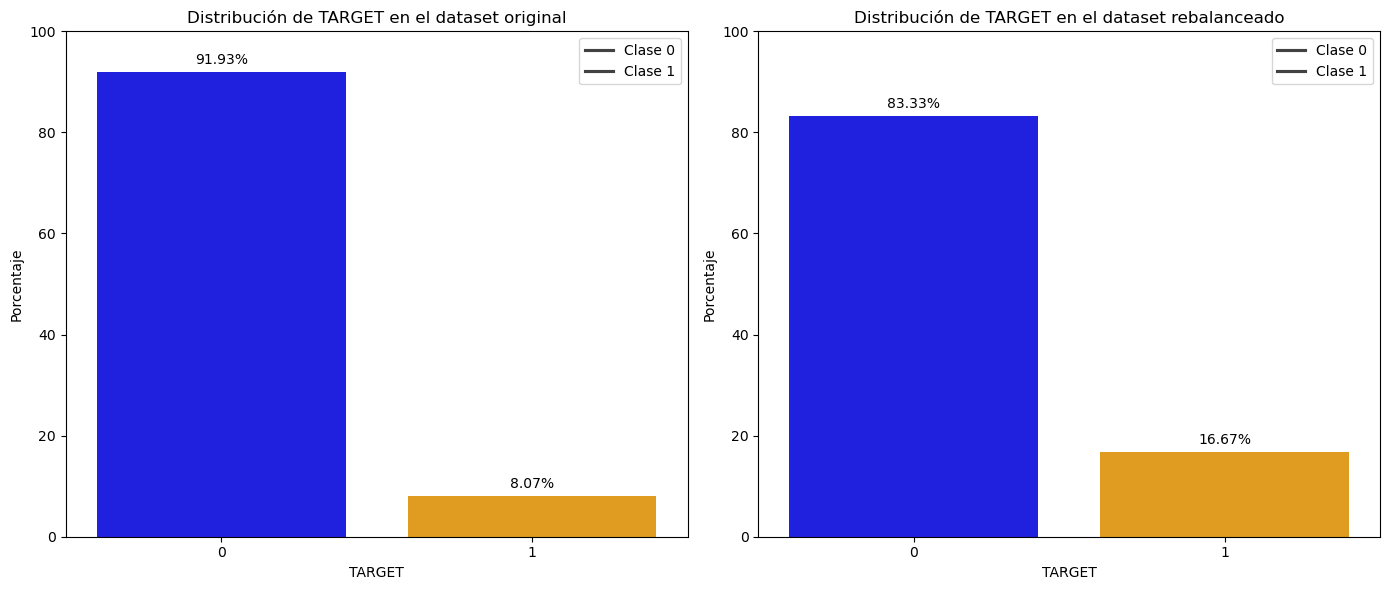

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['blue', 'orange']

# Gráfico para el dataset original
sns.barplot(x=target_percentage.index, y=target_percentage.values, ax=axes[0], palette=colors)
axes[0].set_title('Distribución de TARGET en el dataset original')
axes[0].set_xlabel('TARGET')
axes[0].set_ylabel('Porcentaje')
axes[0].legend(['Clase 0', 'Clase 1'])

# Añadir porcentajes a las barras del dataset original
for i, v in enumerate(target_percentage.values):
    axes[0].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Gráfico para el dataset rebalanceado
sns.barplot(x=target_percentage_resampled.index, y=target_percentage_resampled.values, ax=axes[1], palette=colors)
axes[1].set_title('Distribución de TARGET en el dataset rebalanceado')
axes[1].set_xlabel('TARGET')
axes[1].set_ylabel('Porcentaje')
axes[1].legend(['Clase 0', 'Clase 1'])

# Añadir porcentajes a las barras del dataset rebalanceado
for i, v in enumerate(target_percentage_resampled.values):
    axes[1].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Ajustar la misma escala en el eje y para ambos gráficos
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

Como podemos observar, tenemos nuestros datasets graficados en los que podemos ver el balanceo de la variable objetivo.

He realizado esta técnica de rebalanceo mixto debido a que así combino las ventajas del oversampling (aumento información en la clase minoritaria) y el undersampling (reduzco el desequilibrio excesivo). Además, evito problemas de sobreajuste asociados con el oversampling puro y mantengo el tamaño de mis registros comparándolo con mi conjunto de entrenamiento original para que los modelos puedan entrenarse de manera similar.

He de decir que en principio esta técnica me parece más equilibrada que el Oversampling o Undersampling puro por lo comentado anteriormente, veremos si se refleja en los resultados de nuestros modelos. Finalmente decidiré cuál usar en función de los resultados con ambos conjuntos de datos.

***

## Modelado

En esta sección se analizarán los diferentes modelos seleccionados junto con los 2 datasets disponibles. El objetivo es finalizar el notebook con la elección del modelo más adecuado, del dataset que mejor se adapte a este modelo y de los hiperparámetros que optimicen los resultados deseados. Para alcanzar este objetivo, se seguirán tres etapas principales:

1. Comparación de modelos: A través de un pipeline, se evaluarán todos los modelos utilizando sus hiperparámetros por defecto, sin ajustes previos, con el fin de identificar cuál ofrece el mejor desempeño inicial.

2. Comparación de datasets: Una vez seleccionado el modelo, se procederá a analizar cuál de los conjuntos de datos logra las métricas más satisfactorias.

3. Optimización de hiperparámetros: Finalmente, se realizará una búsqueda de los hiperparámetros óptimos para el modelo seleccionado utilizando el dataset elegido, empleando un enfoque de Validación Cruzada.

### Modelo Base:

Para comenzar, se implementará un modelo sin machine learning, en el cual se asignará de forma automática el valor de la clase mayoritaria a todas las predicciones. En este caso, se asumirá que ningun cliente tiene dificultad de pago, replicando el escenario en el que no fuera posible utilizar un modelo más avanzado.

Para ello, he desarrollado una función personalizada que identifica la clase mayoritaria y, a partir de esta, genera las predicciones correspondientes del modelo base para el análisis.

In [9]:
y_pred_base = f_aux.y_pred_modelo_base(y_train_orig, X_val_orig)

In [10]:
f_aux.summarize_metrics(y_val_orig, y_pred_base)

Accuracy: 0.91927
Balanced Accuracy: 0.50000
F2 Score: 0.00000
F1 Score: 0.00000
Precision: 0.00000
Recall: 0.00000

Confusion Matrix:
[[45230     0]
 [ 3972     0]]


Grafico la matriz de confusión en su versión absoluta y normalizada.

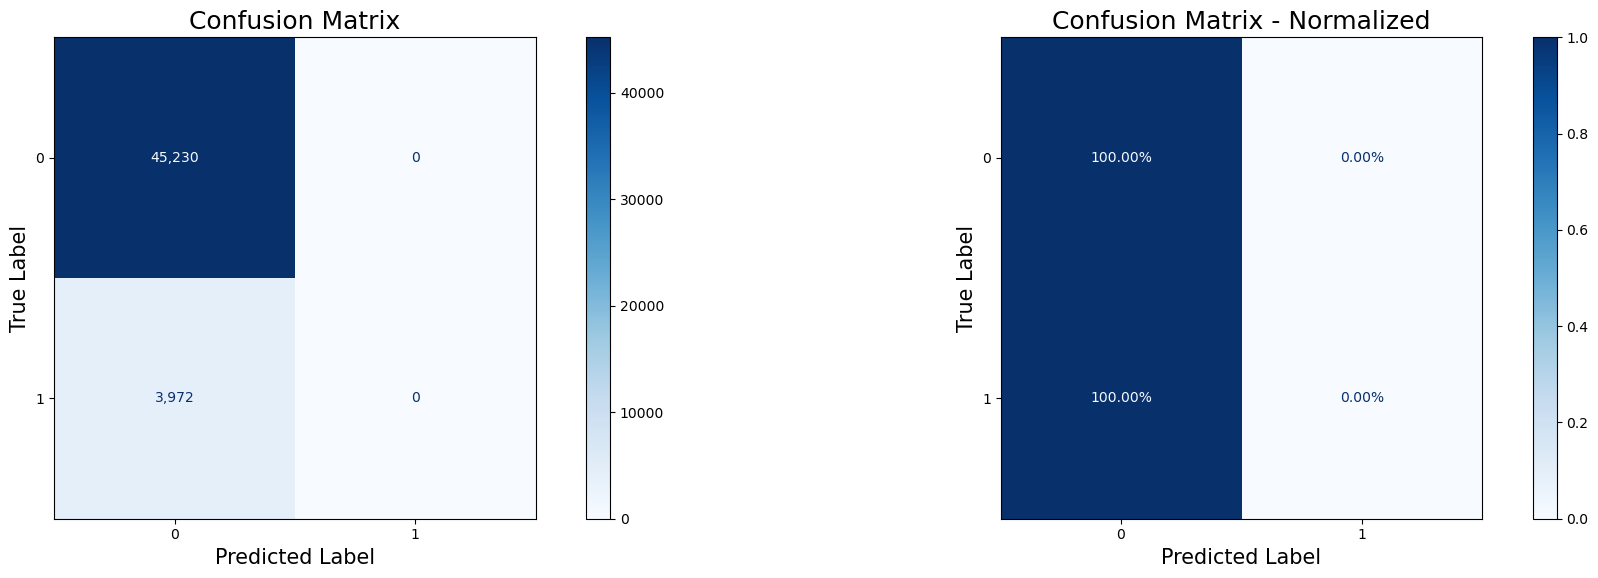

In [10]:
f_aux.plot_confusion_matrix(y_val_orig, y_pred_base)

***

## 1. Comparación de modelos


### Logistic Regression

Antes de implementar el pipeline completo, se ejecutará un modelo de regresión logística para verificar que todo funcione correctamente y que los datos procesados sean compatibles con los objetos de SciKitLearn.

La regresión logística es un modelo lineal del tipo GLM que ofrece buenos resultados en problemas de clasificación binaria, lo que lo convierte en una opción preliminar adecuada para los objetivos planteados.

In [11]:
lr = LogisticRegression(C=1)
lr.fit(X_train_orig, y_train_orig)

y_pred_lr = lr.predict(X_val_orig)

f_aux.summarize_metrics(y_val_orig, y_pred_lr)

Accuracy: 0.91939
Balanced Accuracy: 0.50397
F2 Score: 0.01066
F1 Score: 0.01686
Precision: 0.54839
Recall: 0.00856

Confusion Matrix:
[[45202    28]
 [ 3938    34]]


Los resultados son bastante deplorables, debido a que son muy pocas las dificultades de pago que predice. El Accuracy no es la métrica que más importa en este caso, ya que al tener un gran desbalanceo nos interesa que prediga bien los casos de dificultad de pago.

### Support Vector Machine

El modelo de Support Vector Machine (SVM) es conocido por su alta demanda computacional, lo que lo hace menos práctico para datasets grandes. Por esta razón, se probará por separado.

Como se comentó en clase, voy a realizar un sample de 'X' registros aleatorios en los que iré probando el modelo hasta que computacionalmente pueda ejecutarlo. Daré mis conclusiones al ver los resultados.

In [18]:
X_train_subsampled = X_train_orig.sample(40000, random_state=seed)
y_train_subsampled = y_train_orig.sample(40000, random_state=seed)
X_val_subsampled = X_val_orig.sample(40000, random_state=seed)
y_val_subsampled = y_val_orig.sample(40000, random_state=seed)

X_train_subsampled.shape, y_train_subsampled.shape, X_val_subsampled.shape, y_val_subsampled.shape

((40000, 21), (40000,), (40000, 21), (40000,))

In [19]:
%%time

svc = SVC(kernel="rbf", degree=3) # utilizo los valores por defecto.
svc.fit(X_train_subsampled, y_train_subsampled)

y_pred_svc = svc.predict(X_val_subsampled)
f_aux.summarize_metrics(y_val_subsampled, y_pred_svc)

Accuracy: 0.91953
Balanced Accuracy: 0.50000
F2 Score: 0.00000
F1 Score: 0.00000
Precision: 0.00000
Recall: 0.00000

Confusion Matrix:
[[36781     0]
 [ 3219     0]]
CPU times: total: 3min 5s
Wall time: 3min 6s


Después de más de una hora intentando ejecutar este modelo, la capacidad computacional que requiere no justifica en mi caso las métricas y buenos resultados que pueda proporcionar, es por ello que he probado a realizar un subsample de 40,000 registros en los que he podido ejecutar el modelo, los resultados no son nada buenos. Procederé a ejecutar el pipeline con mis demás modelos.

## Pipeline con los Modelos Restantes

A continuación, se procederá a evaluar el resto de los modelos mediante un pipeline, asegurando una comparación estructurada y consistente:

- `DummyClassifier`: Representa un modelo base proporcionado por SKLearn, útil para establecer un punto de referencia.
- `Random Forest Classifier`: Ensamble compuesto por múltiples árboles de decisión, representando los métodos de Bagging.
- `GaussianNB`: Clasificador Naive Bayes basado en distribuciones gaussianas, reconocido por su eficiencia en tareas de aprendizaje supervisado.
- `Decision Tree Classifier`: Modelo de árbol de decisión simple que permite una interpretación directa de los resultados.
- `XGBoost Classifier`: Un modelo destacado dentro de los algoritmos de boosting, ampliamente reconocido por su efectividad en problemas complejos de machine learning.
- `LightGBM Classifier`: Otro modelo de boosting y uno de mis favoritos, gracias a su gran eficiencia y optimización en tiempos de procesamiento.
- `AdaBoost Classifier`: Un modelo destacado dentro de los algoritmos de boosting, conocido por combinar múltiples clasificadores débiles para lograr un rendimiento robusto en problemas de machine learning.
- `GradientBoosting Classifier`: Un modelo sobresaliente en la familia de algoritmos de boosting, diseñado para optimizar el rendimiento mediante la minimización progresiva del error en problemas complejos de clasificación.

In [12]:
classifiers = [
    DummyClassifier() # modelo base de SKLearn
    ,GaussianNB() # Clasificador de NaiveBayes
    ,DecisionTreeClassifier() # Árbol de decisión simple
    ,GradientBoostingClassifier() # Modelo boosting
    ,RandomForestClassifier() # Random Forest en representación de modelos de Bagging
    ,XGBClassifier() # Modelo boosting
    ,lgb.LGBMClassifier() # Modelo boosting
    ,AdaBoostClassifier() # Modelo boosting
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_orig, y_train_orig)   
    y_pred_pipe = pipe.predict(X_val_orig)
    print(f'\033[1m{classifier}\033[0m')
    f_aux.summarize_metrics(y_val_orig, y_pred_pipe)
    print("__________________________________________________________________________________________")

DummyClassifier()
Accuracy: 0.91927
Balanced Accuracy: 0.50000
F2 Score: 0.00000
F1 Score: 0.00000
Precision: 0.00000
Recall: 0.00000

Confusion Matrix:
[[45230     0]
 [ 3972     0]]
__________________________________________________________________________________________
GaussianNB()
Accuracy: 0.23696
Balanced Accuracy: 0.55788
F2 Score: 0.32812
F1 Score: 0.16599
Precision: 0.09103
Recall: 0.94058

Confusion Matrix:
[[ 7923 37307]
 [  236  3736]]
__________________________________________________________________________________________
DecisionTreeClassifier()
Accuracy: 0.85279
Balanced Accuracy: 0.54112
F2 Score: 0.16411
F1 Score: 0.15671
Precision: 0.14577
Recall: 0.16944

Confusion Matrix:
[[41286  3944]
 [ 3299   673]]
__________________________________________________________________________________________
GradientBoostingClassifier()
Accuracy: 0.91962
Balanced Accuracy: 0.50731
F2 Score: 0.01938
F1 Score: 0.03040
Precision: 0.57944
Recall: 0.01561

Confusion Matrix:
[[45185  

Observamos resultados interesantes, de primera mano los modelos que peor se comportan con nuestro dataset desbalanceado son los modelos 
`DummyClassifier()` por razones obvias y el modelo de `LogisticRegression()` por lo comentado anteriormente. También el modelo `GaussianNB()`, ya que no predice bien la clase positiva, proporcionando muchos falsos positivos que supondrían un gran coste de oportunidad para una empresa en el ámbito de negocio. Además, el modelo `RandomForestClassifier()` para mi sorpresa muestra métricas muy pobres.

Los modelos que mejor se comportan sin duda son el `DecisionTreeClassifier()` y los modelos de boosting  `LGBMClassifier()`, `XGBClassifier()`, `AdaBoostClassifier()` y por último `GradientBoostingClassifier()`. 

***

## 2. Comparación de datasets

Antes de concluir la decisión de la elección del modelo voy a ejecutar una función propia para observar las métricas de manera más visual. Esta función la aplicaré en mi muestra original y en la muestra rebalanceada anteriormente con la técnica de Oversampling + Undersampling en la que conseguimos un dataset del mismo tamaño que el original solo cambiando la proporción de clases de nuestra variable objetivo.

En base a las métricas anteriores y a las siguientes evaluadas con ambos conjuntos, tanto el original como el rebalanceado, tomaré la decisión final de elección del modelo y daré mis conclusiones.

### Dataset Rebalanceado

In [12]:
classifiers = [
    DummyClassifier() # modelo base de SKLearn
    ,GaussianNB() # Clasificador de NaiveBayes
    ,DecisionTreeClassifier() # Árbol de decisión simple
    ,GradientBoostingClassifier() # Modelo boosting
    ,RandomForestClassifier() # Random Forest en representación de modelos de Bagging
    ,XGBClassifier() # Modelo boosting
    ,lgb.LGBMClassifier() # Modelo boosting
    ,AdaBoostClassifier() # Modelo boosting
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_resampled, y_train_resampled)   
    y_pred_pipe = pipe.predict(X_val_orig)
    print(f'\033[1m{classifier}\033[0m')
    f_aux.summarize_metrics(y_val_orig, y_pred_pipe)
    print("__________________________________________________________________________________________")

DummyClassifier()
Accuracy: 0.91927
Balanced Accuracy: 0.50000
F2 Score: 0.00000
F1 Score: 0.00000
Precision: 0.00000
Recall: 0.00000

Confusion Matrix:
[[45230     0]
 [ 3972     0]]
__________________________________________________________________________________________
GaussianNB()
Accuracy: 0.16402
Balanced Accuracy: 0.53267
F2 Score: 0.31775
F1 Score: 0.15810
Precision: 0.08604
Recall: 0.97231

Confusion Matrix:
[[ 4208 41022]
 [  110  3862]]
__________________________________________________________________________________________
DecisionTreeClassifier()
Accuracy: 0.80072
Balanced Accuracy: 0.56114
F2 Score: 0.22878
F1 Score: 0.18244
Precision: 0.13639
Recall: 0.27543

Confusion Matrix:
[[38303  6927]
 [ 2878  1094]]
__________________________________________________________________________________________
GradientBoostingClassifier()
Accuracy: 0.91541
Balanced Accuracy: 0.54062
F2 Score: 0.11057
F1 Score: 0.15165
Precision: 0.39829
Recall: 0.09366

Confusion Matrix:
[[44668  

Antes de seleccionar el modelo, se nota una clara mejoría en el desempeño de prácticamente todos los modelos excluyendo al Dummy y al GaussianNB con esta muestra rebalanceada. Como ya hemos comentado anteriormente, al tener una distribución de la clase 0 en un 66.66% y de la clase 1 en un 33.33% manteniendo el tamaño de nuestro conjunto de datos, puede permitir a los modelos llevar a cabo un mejor entrenamiento que les permita diferenciar y clasificar de una mejor manera entre clases.

Es por ello que a priori, utilizaré esta muestra rebalanceada para la implementación final del modelo.

### Modelo a seleccionar

Una vez ejecutados todos los modelos anteriormente expuestos, procederé a seleccionar el modelo final con el que trabajaré aportando mis propias conclusiones.

De primera mano quedan descartados los modelos `DummyClassifier()` por razones obvias y el modelo de `LogisticRegression()` por lo comentado anteriormente. Descartaré también el modelo `GaussianNB()`, ya que no predice bien la clase positiva, proporcionando muchos falsos positivos que supondrían un gran coste de oportunidad para una empresa en el ámbito de negocio.

En cuanto a los modelos de árbol y boosting, el que mejores métricas ha proporcionado y más balanceado ha sido el modelo de árbol `DecisionTreeClassifier()`, seguido de los modelos de boosting `LGBMClassifier()`, `XGBClassifier()`, `AdaBoostClassifier()` y por último `GradientBoostingClassifier()`. He de comentar que aunque el modelo de árbol DecisionTree haya obtenido las mejores métricas, al igual que el RandomForest los modelos de boosting tienen potencial de mejora con la optimización de hiperparámetros.

Destacar el desempeño del modelo `RandomForestClassifier()`, cuando la muestra está rebalanceada, proporcionando unas métricas muy buenas. Además con la optimización de hiperparámetros podríamos aumentar aún más su desempeño. El principal problema que presenta este modelo es su coste computacional, más elevado que el de los modelos de boosting mencionados.

El modelo seleccionado entre todos los evaluados es el **`LGBMClassifier()`** y el **`XGBoostClassifier()`**. Estos modelos no solo obtuvieron métricas satisfactorias, sino que también destacan por su eficiencia en tiempos de procesamiento frente a otros modelos complejos, como los de bagging y boosting. Además, poseen un gran potencial de optimización, lo que lo convierte en una opción sólida a pesar de no haber mostrado las mejores métricas iniciales. Sin embargo, si tras la optimización de hiperparámetros no supera al RandomForest, reconsideraré esta elección.

***

## 3. Optimización de hiperparámetros

En la documentación de LightGBM se ofrecen diversas recomendaciones para el ajuste de los hiperparámetros del modelo, muchos de los cuales pueden ser bastante numerosos. Estas recomendaciones han servido de base para seleccionar las opciones que he incluido en mi grid de parámetros.

He enfocado mi análisis en los hiperparámetros principales mencionados, siguiendo indicaciones para determinar valores que minimicen tanto el overfitting como el underfitting. Considero que los parámetros seleccionados se ajustan adecuadamente al tamaño del dataset y ofrecen una buena diversidad de opciones para el cálculo.

Los hiperparámetros serán evaluados mediante un Random Search, un método que suele producir resultados similares al Grid Search, pero con tiempos de procesamiento significativamente menores. Mientras que el uso de GridSearchCV implicó horas de procesamiento, considero que el coste computacional adicional no justifica las mínimas mejoras que podría aportar al resultado final.

Dado que ya he seleccionado tanto el modelo como el dataset definitivo, la búsqueda de hiperparámetros se realizará sobre un conjunto que combina el train y el validation set, maximizando así la cantidad de datos disponibles para el análisis. La evaluación final se llevará a cabo sobre el conjunto de test, garantizando una comparación adecuada. Una vez determinados los mejores hiperparámetros, implementaré el modelo y analizaré sus resultados en un notebook separado.

**Realizo de nuevo el mix de Undersampling + Oversampling para tener el set de train preparado para este análisis**

In [13]:
over = SMOTE(sampling_strategy=0.1, random_state=seed)
under = RandomUnderSampler(sampling_strategy=0.2, random_state=seed)

# Crear el pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Aplicar el pipeline a los datos de entrenamiento
X_train_2, y_train_2 = pipeline.fit_resample(X_train_orig, y_train_orig)


X_train_2.shape, y_train_2.value_counts(normalize=True)

((108546, 21),
 TARGET
 0    0.833333
 1    0.166667
 Name: proportion, dtype: float64)

Procedemos a la búsqueda de nuestros mejores hiperparámetros

### LigthGBM

In [16]:
f2_scorer = make_scorer(fbeta_score, beta=2)

lgbm = lgb.LGBMClassifier(verbosity=-1, is_unbalance=True, objetive='binary')
param_grid = {
    'n_estimators ': np.random.randint(100,1000,10) 
    ,'max_depth' : np.random.randint(3,10,10)
    ,'num_leaves' : np.random.randint(round(2**3/1.5),round(2**10/1.5),30) # En a documentación de LightGBM se especifica que num_leaves se relaciona con el max_depth así: (num_leaves = (2^max_depth/1.5))
    ,'min_data_in_leaf' : np.random.randint(1000,2000,10)
    ,'learning_rate': np.random.uniform(0.01, 0.05,10)
    ,'subsample': np.random.uniform(0.8,1,10)
    ,'colsample_bytree': np.random.uniform(0.8,1,10)
    ,'min_child_samples': np.random.randint(20,1000,30)
}

scoring = {'f2':f2_scorer,'f1':'f1','accuracy':'accuracy', 'balanced_accuracy':'balanced_accuracy', 'precision':'precision', 'recall':'recall','roc_auc':'roc_auc'}

CV_rs = RandomizedSearchCV(lgbm, param_grid, n_iter=50, cv=20, random_state=seed, n_jobs=-1, scoring=scoring, refit='f2')

CV_rs.fit(X_train_2, y_train_2)  
print(CV_rs.best_params_)    
print(CV_rs.best_score_)

{'subsample': np.float64(0.8787050565094242), 'num_leaves': np.int32(195), 'n_estimators ': np.int32(354), 'min_data_in_leaf': np.int32(1480), 'min_child_samples': np.int32(105), 'max_depth': np.int32(9), 'learning_rate': np.float64(0.045557505849110724), 'colsample_bytree': np.float64(0.985711235209634)}
0.5468081060613832


In [17]:
CV_rs.best_estimator_

LGBMClassifier(colsample_bytree=np.float64(0.985711235209634),
               is_unbalance=True,
               learning_rate=np.float64(0.045557505849110724),
               max_depth=np.int32(9), min_child_samples=np.int32(105),
               min_data_in_leaf=np.int32(1480), n_estimators =np.int32(354),
               num_leaves=np.int32(195), objetive='binary',
               subsample=np.float64(0.8787050565094242), verbosity=-1)

In [18]:
CV_rs.best_params_

{'subsample': np.float64(0.8787050565094242),
 'num_leaves': np.int32(195),
 'n_estimators ': np.int32(354),
 'min_data_in_leaf': np.int32(1480),
 'min_child_samples': np.int32(105),
 'max_depth': np.int32(9),
 'learning_rate': np.float64(0.045557505849110724),
 'colsample_bytree': np.float64(0.985711235209634)}

In [19]:
CV_rs.best_score_

np.float64(0.5468081060613832)

Utilicé rangos de valores random, que se ajustan a los valores recomendados en la documentación de LightGBM. Usé Random Search debido a que Grid Search tuvo un desempeño lento y demandante computacionalmente.

### XGBoost

In [14]:
f2_scorer = make_scorer(fbeta_score, beta=2)

xgb = XGBClassifier(verbosity=0, objective='binary:logistic', use_label_encoder=False)

param_grid = {
    'n_estimators': np.random.randint(100, 1000, 10),
    'max_depth': np.random.randint(3, 10, 10),
    'learning_rate': np.random.uniform(0.01, 0.05, 10),
    'subsample': np.random.uniform(0.8, 1, 30),
    'colsample_bytree': np.random.uniform(0.8, 1, 10),
    'min_child_weight': np.random.randint(1, 10, 10),
    'gamma': np.random.uniform(0, 0.5, 10),
    'max_leaves': np.random.randint(1, 10, 10)
}

scoring = {'f2': f2_scorer, 'f1': 'f1', 'accuracy': 'accuracy', 'balanced_accuracy': 'balanced_accuracy', 'precision': 'precision', 'recall': 'recall', 'roc_auc': 'roc_auc'}

CV_rs2 = RandomizedSearchCV(xgb, param_grid, n_iter=50, cv=10, random_state=seed, n_jobs=-1, scoring=scoring, refit='f2')

CV_rs2.fit(X_train_2, y_train_2)
print(CV_rs2.best_params_)
print(CV_rs2.best_score_)


{'subsample': np.float64(0.8265239209201898), 'n_estimators': np.int32(828), 'min_child_weight': np.int32(7), 'max_leaves': np.int32(9), 'max_depth': np.int32(5), 'learning_rate': np.float64(0.0430728183282488), 'gamma': np.float64(0.08789207464179805), 'colsample_bytree': np.float64(0.9301660737232661)}
0.1452316126948878


In [15]:
CV_rs2.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.9301660737232661), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None,
              gamma=np.float64(0.08789207464179805), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.0430728183282488), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int32(5),
              max_leaves=np.int32(9), min_child_weight=np.int32(7), missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int32(828), n_jobs=None, num_parallel_tree=None,
              random_state=None, ...)

In [16]:
CV_rs2.best_params_

{'subsample': np.float64(0.8265239209201898),
 'n_estimators': np.int32(828),
 'min_child_weight': np.int32(7),
 'max_leaves': np.int32(9),
 'max_depth': np.int32(5),
 'learning_rate': np.float64(0.0430728183282488),
 'gamma': np.float64(0.08789207464179805),
 'colsample_bytree': np.float64(0.9301660737232661)}

In [17]:
CV_rs2.best_score_

np.float64(0.1452316126948878)

***

## Exportamos datos y modelo


Una vez determinado el modelo a utilizar, la configuración de datos óptima para dicho modelo y sus hiperparámetros, procederé a exportar los resultados obtenidos. El entrenamiento y evaluación del modelo definitivo se llevarán a cabo en el siguiente notebook.

In [18]:
pd.concat([X_train_2,y_train_2], axis=1).to_csv('../../data_loan_status/processed/df_train_resampled.csv', index=False)

In [21]:
dump(CV_rs, '../models/CV_lgbm.joblib')

['../models/CV_lgbm.joblib']

In [19]:
dump(CV_rs2, '../models/CV_xgboost.joblib')

['../models/CV_xgboost.joblib']